In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Transform: convert images to tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize RGB channels
])

# Download and load the CIFAR-10 training and test sets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

# Class names
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


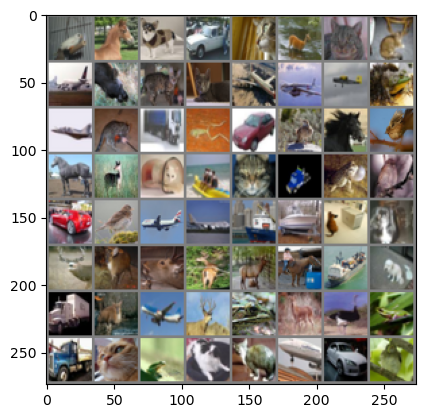

bird  horse dog   car   cat   deer  cat   cat  


In [3]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print class labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))


In [4]:
# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # 3 input channels -> 32 filters
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 32 -> 64 filters
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Flattened size after pooling
        self.fc2 = nn.Linear(128, 10)          # 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool
        x = x.view(-1, 64 * 8 * 8)            # Flatten feature maps
        x = F.relu(self.fc1(x))               # Fully connected 1 -> ReLU
        x = self.fc2(x)                       # Fully connected 2 (output)
        return x

# Instantiate the model
model = SimpleCNN()

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
# Train the model
for epoch in range(10):  # Number of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data  # Get the inputs and labels

        # Zero the gradient buffers
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


[Epoch 1, Batch 100] loss: 1.845
[Epoch 1, Batch 200] loss: 1.528
[Epoch 1, Batch 300] loss: 1.403
[Epoch 1, Batch 400] loss: 1.337
[Epoch 1, Batch 500] loss: 1.247
[Epoch 1, Batch 600] loss: 1.181
[Epoch 1, Batch 700] loss: 1.132
[Epoch 2, Batch 100] loss: 1.030
[Epoch 2, Batch 200] loss: 1.003
[Epoch 2, Batch 300] loss: 0.977
[Epoch 2, Batch 400] loss: 0.960
[Epoch 2, Batch 500] loss: 0.938
[Epoch 2, Batch 600] loss: 0.951
[Epoch 2, Batch 700] loss: 0.928
[Epoch 3, Batch 100] loss: 0.786
[Epoch 3, Batch 200] loss: 0.823
[Epoch 3, Batch 300] loss: 0.828
[Epoch 3, Batch 400] loss: 0.810
[Epoch 3, Batch 500] loss: 0.781
[Epoch 3, Batch 600] loss: 0.790
[Epoch 3, Batch 700] loss: 0.808
[Epoch 4, Batch 100] loss: 0.676
[Epoch 4, Batch 200] loss: 0.691
[Epoch 4, Batch 300] loss: 0.678
[Epoch 4, Batch 400] loss: 0.683
[Epoch 4, Batch 500] loss: 0.689
[Epoch 4, Batch 600] loss: 0.694
[Epoch 4, Batch 700] loss: 0.713
[Epoch 5, Batch 100] loss: 0.584
[Epoch 5, Batch 200] loss: 0.588
[Epoch 5, 

In [7]:
correct = 0
total = 0
with torch.no_grad():  # No gradient calculation for evaluation
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the 10,000 test images: {100 * correct / total:.2f}%')


Accuracy on the 10,000 test images: 70.94%


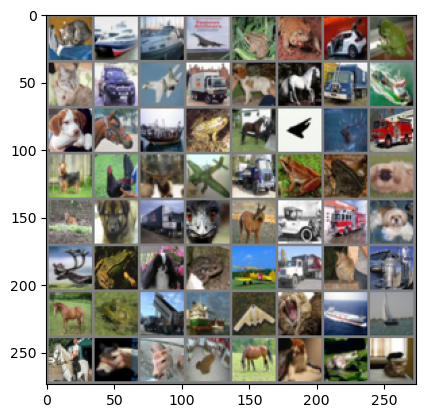

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog 
Predicted:  cat   ship  ship  ship  frog  frog  car   deer 


In [8]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

outputs = model(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(8)))
